In [330]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [331]:
data = pd.read_csv("heart_2020_cleaned.csv")
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [332]:
data.shape

(319795, 18)

In [333]:
data.replace("Yes", 1, inplace = True)
data.replace("No", 0, inplace = True)
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,0,1,Very good,8.0,0,0,0


In [334]:
data['Diabetic'].unique()

array([1, 0, 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [335]:
data.replace("Yes (during pregnancy)", 1, inplace = True)
data.replace("No, borderline diabetes", 0, inplace = True)

In [336]:
data["Sex"].unique()

array(['Female', 'Male'], dtype=object)

In [337]:
data.replace("Female", 1, inplace = True)
data.replace("Male", 0, inplace = True)

# Temporarily Convert Categorical Variables for SMOTE

In [338]:
data["AgeCategory"].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [339]:
data.replace("18-24", 0, inplace = True)
data.replace("25-29", 1, inplace = True)
data.replace("30-34", 2, inplace = True)
data.replace("35-39", 3, inplace = True)
data.replace("40-44", 4, inplace = True)
data.replace("45-49", 5, inplace = True)
data.replace("50-54", 6, inplace = True)
data.replace("55-59", 7, inplace = True)
data.replace("60-64", 8, inplace = True)
data.replace("65-69", 9, inplace = True)
data.replace("70-74", 10, inplace = True)
data.replace("75-79", 11, inplace = True)
data.replace("80 or older", 12, inplace = True)

In [340]:
data["Race"].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [341]:
data.replace("White", 0, inplace = True)
data.replace("Black", 1, inplace = True)
data.replace("Asian", 2, inplace = True)
data.replace("American Indian/Alaskan Native", 3, inplace = True)
data.replace("Hispanic", 4, inplace = True)
data.replace("Other", 5, inplace = True)

In [342]:
data["GenHealth"].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [343]:
data.replace("Poor", 0, inplace = True)
data.replace("Fair", 1, inplace = True)
data.replace("Good", 2, inplace = True)
data.replace("Very good", 3, inplace = True)
data.replace("Excellent", 4, inplace = True)

# Calculate Data Proportions

In [344]:
data['HeartDisease'].value_counts()[0] 

292422

In [345]:
data['HeartDisease'].value_counts()[1]

27373

In [346]:
data['HeartDisease'].value_counts()[0] / data.shape[0]

0.9144045404086993

In [347]:
data['HeartDisease'].value_counts()[1] / data.shape[0]

0.08559545959130067

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

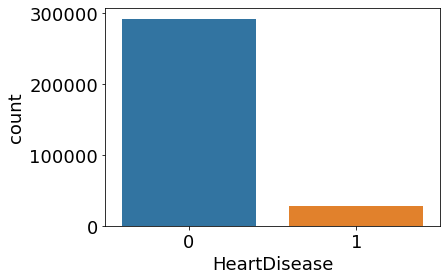

In [348]:
sns.countplot(x='HeartDisease',data=data)

# SMOTE

In [349]:
X = data[['BMI', 'Smoking', 'AlcoholDrinking', "Stroke", 'PhysicalHealth', "MentalHealth", "DiffWalking", "Sex", "AgeCategory", "Race", "Diabetic", "PhysicalActivity", "GenHealth", "SleepTime", "Asthma", "KidneyDisease", "SkinCancer"]]
y = data.HeartDisease

In [350]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)

In [351]:
test = pd.concat([X_test, y_test], axis=1)

In [352]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
oversampled = SMOTE(random_state=0)
X_train_smote, y_train_smote = oversampled.fit_resample(X_train, y_train)

In [353]:
train_smote = pd.concat([X_train_smote, y_train_smote], axis=1)

# Change Categorical Data Back to Categories

In [354]:
def reverse_reformat(data):
    replacement_age = {0 : "18-24", 1 : "25-29", 2 : "30-34", 3 : "35-39", 4 : "40-44", 5 : "45-49", 6 : "50-54", 7: "55-59", 8: "60-64", 9: "65-69", 10: "70-74", 11:  "75-79", 12: "80 or older"}
    replacement_race = { 0: "White", 1: "Black", 2 : "Asian", 3: "American Indian/Alaskan Native",  4: "Hispanic", 5: "Other"}
    replacement_genhealth = {0: "Poor", 1: "Fair", 2: "Good", 3: "Very good", 4: "Excellent"}
    replacement_bmi_cut = {0: '(11.937, 19.55]', 1: '(19.55, 27.08]', 2: '(27.08, 34.61]', 3: '(34.61, 42.14]', 4: '(42.14, 49.67]', 5: '(49.67, 57.2]', 6: '(57.2, 64.73]', 7: '(64.73, 72.26]', 8: '(72.26, 79.79]', 9: '(79.79, 87.32]', 10: '(87.32, 94.85]'}
    replacement_bmi_qcut = {0: '(12.019, 21.26]', 1: '(21.26, 23.01]', 2: '(23.01, 24.33]', 3: '(24.33, 25.61]', 4: '(25.61, 26.61]', 5: '(26.61, 27.89]', 6: '(27.89, 29.26]', 7: '(29.26, 31.0]', 8: '(31.0, 33.23]', 9: '(33.23, 36.92]', 10: '(36.92, 94.85]'}
    data['AgeCategory'].replace(replacement_age, inplace = True)
    data['Race'].replace(replacement_race, inplace = True)
    data['GenHealth'].replace(replacement_genhealth, inplace = True)

reverse_reformat(train_smote)
reverse_reformat(data)
train_smote.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,31.63,0,0,0,0.0,0.0,0,0,40-44,Hispanic,0,1,Excellent,6.0,0,0,0,0
1,27.98,1,0,0,0.0,0.0,0,0,70-74,White,1,1,Fair,8.0,0,0,0,1
2,26.58,1,0,0,0.0,0.0,0,0,45-49,White,0,1,Excellent,6.0,0,0,0,0
3,33.28,1,0,0,0.0,23.0,0,1,70-74,White,1,1,Good,8.0,0,0,0,0
4,26.57,0,0,0,0.0,0.0,0,1,18-24,Hispanic,0,0,Very good,8.0,0,0,0,0


# Some EDA

<AxesSubplot:>

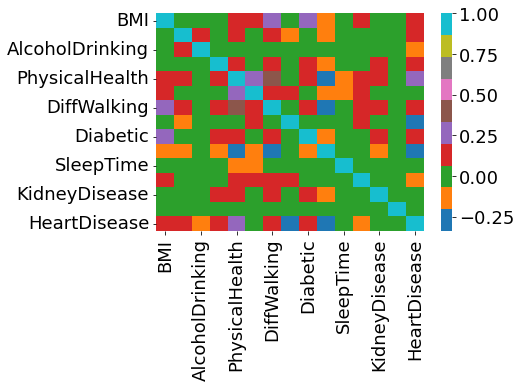

In [355]:
sns.heatmap(train_smote.corr(), cmap='tab10')

In [356]:
train_smote.corr().loc["HeartDisease", :]

BMI                 0.092933
Smoking             0.075172
AlcoholDrinking    -0.160045
Stroke              0.079751
PhysicalHealth      0.243135
MentalHealth        0.045628
DiffWalking         0.178598
Sex                -0.265262
Diabetic            0.120950
PhysicalActivity   -0.263233
SleepTime           0.009837
Asthma             -0.097669
KidneyDisease       0.040832
SkinCancer          0.021672
HeartDisease        1.000000
Name: HeartDisease, dtype: float64

<AxesSubplot:xlabel='AgeCategory', ylabel='count'>

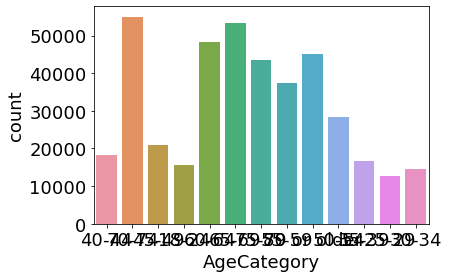

In [357]:
sns.countplot(x='AgeCategory',data=train_smote)

# Baseline Model

In [358]:
model = sm.logit(formula = 'HeartDisease~BMI+Smoking+AlcoholDrinking+Stroke+PhysicalHealth+MentalHealth+DiffWalking+Sex+AgeCategory+Race+Diabetic+PhysicalActivity+GenHealth+SleepTime+Asthma+KidneyDisease+SkinCancer', data = train_smote).fit()

Optimization terminated successfully.
         Current function value: 0.444383
         Iterations 7


In [359]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:               409390
Model:                          Logit   Df Residuals:                   409354
Method:                           MLE   Df Model:                           35
Date:                Sat, 04 Mar 2023   Pseudo R-squ.:                  0.3589
Time:                        13:25:54   Log-Likelihood:            -1.8193e+05
converged:                       True   LL-Null:                   -2.8377e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -2.9293      0.057    -51.167      0.000      -3.042      -2.817
AgeCategory[T.25-29]           0.2979      0.050      5.915      0.000       0.199       0.397
AgeCategory[T.30-34]           0.6011      0.047     12.896      0.000       0.510       0.692
AgeCategory[T.35-39]           0.8569      0.044     19.453      0.000       0.771       0.943
AgeCategory[T.40-44]           1.2022      0.042     28.594      0.000       1.120       1.285
AgeCategory[T.45-49]           1.5427      0.041     37.921      0.000       1.463       1.622
AgeCategory[T.50-54]           1.9871      0.039     50.655      0.000       1.910       2.064
AgeCategory[T.55-59]           2.3104      0.039     60.007      0.000       2.235       2.386
AgeCategory[T.60-64]           2.6257      0.038     68.923      0.000       2.551       2.700
AgeCategory[T.65-69]           2.9110      0.038     76.585      0.000       2.837       2.986
AgeCategory[T.70-74]           3.2515      0.038     85.209      0.000       3.177       3.326
AgeCategory[T.75-79]           3.5531      0.039     91.574      0.000       3.477       3.629
AgeCategory[T.80 or older]     3.6044      0.039     92.838      0.000       3.528       3.680
Race[T.Asian]                 -0.8495      0.046    -18.556      0.000      -0.939      -0.760
Race[T.Black]                 -1.3654      0.037    -37.240      0.000      -1.437      -1.294
Race[T.Hispanic]              -0.5061      0.035    -14.620      0.000      -0.574      -0.438
Race[T.Other]                 -0.9137      0.041    -22.124      0.000      -0.995      -0.833
Race[T.White]                 -0.1412      0.031     -4.545      0.000      -0.202      -0.080
GenHealth[T.Fair]              3.1064      0.020    156.401      0.000       3.067       3.145
GenHealth[T.Good]              2.0901      0.017    122.426      0.000       2.057       2.124
GenHealth[T.Poor]              4.0816      0.028    147.792      0.000       4.027       4.136
GenHealth[T.Very good]         1.1017      0.017     64.206      0.000       1.068       1.135
BMI                            0.0073      0.001     10.372      0.000       0.006       0.009
Smoking                       -0.1826      0.009    -21.419      0.000      -0.199      -0.166
AlcoholDrinking               -1.8634      0.030    -61.580      0.000      -1.923      -1.804
Stroke                         0.0755      0.021      3.640      0.000       0.035       0.116
PhysicalHealth                -0.0052      0.001     -8.601      0.000      -0.006      -0.004
MentalHealth                   0.0076      0.001     13.410      0.000       0.006       0.009
DiffWalking                   -0.4525      0.013    -35.581      0.000      -0.477      -0.428
Sex                           -1.3631      0.009   -153.837      0.000      -1.380      -1.346
Diabetic                      -0.2224      0.012    -19.322      0.000      -0.245      -0.200
PhysicalAct

In [360]:
from sklearn.metrics import roc_curve, auc
#Function to compute confusion matrix and prediction accuracy on test/train data
def confusion_matrix_data(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))
    return pred_values

Classification accuracy = 81.3%
Precision = 23.9%
TPR or Recall = 54.0%
FNR = 46.0%
FPR = 16.1%
ROC-AUC = 78.7%


0         0.045198
1         0.431221
2         0.801958
3         0.647883
4         0.033629
            ...   
319790    0.681259
319791    0.056859
319792    0.150476
319793    0.072715
319794    0.606151
Length: 319795, dtype: float64

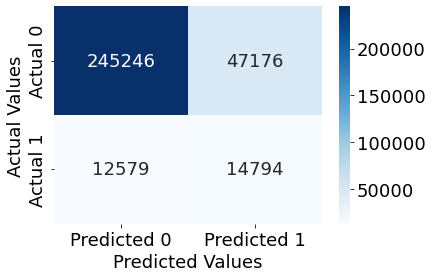

In [361]:
confusion_matrix_data(data,data.HeartDisease,model,0.6)

# Forward Stepwise Selection

In [362]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import time

In [363]:
#Race dummy

In [423]:
def makeDummies(data):
    data = pd.concat([data, pd.get_dummies(data['Race'])], axis=1)
    data = pd.concat([data, pd.get_dummies(data['AgeCategory'])], axis=1)
    data = pd.concat([data, pd.get_dummies(data['GenHealth'])], axis=1)
    data = data.drop(columns=['Race', 'AgeCategory', 'GenHealth'])
    data.rename(columns={"18-24": "Age1", "25-29": "Age2", "30-34": "Age3","35-39": "Age4","40-44": "Age5","45-49": "Age6","50-54": "Age7","55-59": "Age8","60-64": "Age9","65-69": "Age10","70-74": "Age11","75-79": "Age12","80 or older": "Age13"}, inplace = True)
    data.rename(columns={"Very good": "Verygood", "American Indian/Alaskan Native": "AmericanIndianAlaskanNative"}, inplace = True)
    return data
    
    

In [364]:
copy = train_smote.copy()

In [424]:
train_smote = copy

In [425]:
train_smote = makeDummies(train_smote)

In [427]:
train_smote.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,...,Age9,Age10,Age11,Age12,Age13,Excellent,Fair,Good,Poor,Verygood
0,31.63,0,0,0,0.0,0.0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,27.98,1,0,0,0.0,0.0,0,0,1,1,...,0,0,1,0,0,0,1,0,0,0
2,26.58,1,0,0,0.0,0.0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,33.28,1,0,0,0.0,23.0,0,1,1,1,...,0,0,1,0,0,0,0,1,0,0
4,26.57,0,0,0,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [399]:
X = train_smote[['BMI', 'Smoking', 'AlcoholDrinking', "Stroke", "Sex",'PhysicalHealth', "DiffWalking", "Diabetic", "PhysicalActivity", "SleepTime", "Asthma", "KidneyDisease", "SkinCancer", "Age1", "Age2", "Age3", "Age4", "Age5", "Age6", "Age7", "Age8", "Age9", "Age10", "Age11", "Age12", "Age13", "White", "Black", "Asian", "AmericanIndianAlaskanNative", "Hispanic", "Other", "Poor", "Fair", "Good", "Verygood", "Excellent"]]


In [400]:
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.logit('HeartDisease~' + '+'.join(predictor_subset),data = train_smote).fit()
    llr_pvalue = model.llr_pvalue
    return {"model":model, "llr_pvalue":llr_pvalue}
#Function to select the best model amongst all models with 'k' predictors
def getBest_model(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset((list(combo))))

    # Wrap everything up in a dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['llr_pvalue'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    return best_model

In [401]:
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['llr_pvalue'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [402]:
def forward_selection():
    models_best = pd.DataFrame(columns=["llr_pvalue", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [403]:
models_best = forward_selection()


Optimization terminated successfully.
         Current function value: 0.688789
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.690319
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.678547
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.689890
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.657472
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.662103
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.676878
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.685752
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.657880
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.693099
  

/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.501478
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.500109
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.503296
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.503346
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.503605
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.502974
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.496847
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.493022
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.501012
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.494559
  

/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.500109
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.503296
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.503346
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.503605
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.502974
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.496847
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.493022
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.501012
         Iterations 34
         Current function value: 0.494559
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.484906
         Iterations 8
Processed  11 models on 27 predictors in 77.7968590259552 seconds.
         Current function value: 0.499692
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.501447
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.500477
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.500679
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.501373
         Iterations 11
         Current function value: 0.494670
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.490340
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.498774
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.491863
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.482683
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processed  10 models on 28 predictors in 81.48668503761292 seconds.
         Current function value: 0.499501
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.499160
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.499608
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.499247
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.492979
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.488637
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.496926
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.490161
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.480830
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processed  9 models on 29 predictors in 71.29917478561401 seconds.
         Current function value: 0.499054
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.499486
         Iterations 8
         Current function value: 0.498924
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.492780
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.488500
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.496733
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.489995
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.480640
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processed  8 models on 30 predictors in 61.994763135910034 seconds.
         Current function value: 0.498673
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.498673
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.492368
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.488034
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.496282
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.489532
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.480222
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processed  7 models on 31 predictors in 64.6460018157959 seconds.
         Current function value: 0.498673
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.491993
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.487760
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.495882
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.489197
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.479850
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processed  6 models on 32 predictors in 60.78644299507141 seconds.
         Current function value: 0.491993
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.487760
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.495882
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.489197
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.479850
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processed  5 models on 33 predictors in 36.530842781066895 seconds.
         Current function value: 0.471174
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.487818
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.483004
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.473249
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processed  4 models on 34 predictors in 31.85187005996704 seconds.
         Current function value: 0.450283
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.467496
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.456356
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processed  3 models on 35 predictors in 29.19456386566162 seconds.
         Current function value: 0.444603
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.444603
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processed  2 models on 36 predictors in 25.735631227493286 seconds.
         Current function value: 0.444603
         Iterations: 35


/Users/candytanti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processed  1 models on 37 predictors in 11.443283319473267 seconds.
Total elapsed time: 1525.1356852054596 seconds.


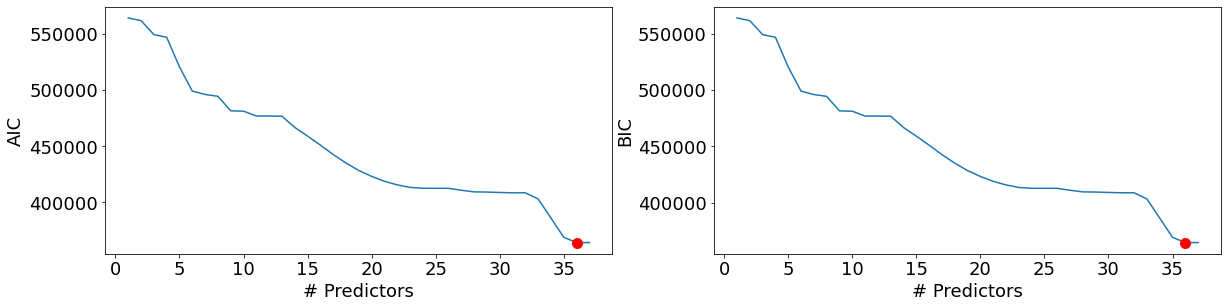

In [404]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    llr_pvalue = models_best.apply(lambda row: row[1].llr_pvalue, axis=1)

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 1)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')
best_sub_plots()

# VIF

In [406]:
X = train_smote[['BMI', 'Smoking', 'AlcoholDrinking', "Stroke", "Sex",'PhysicalHealth', "DiffWalking", "Diabetic", "PhysicalActivity", "SleepTime", "Asthma", "KidneyDisease", "SkinCancer"]]


In [407]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

             feature        VIF
0              const  54.782921
1                BMI   1.113899
2            Smoking   1.035308
3    AlcoholDrinking   1.016687
4             Stroke   1.029939
5                Sex   1.039117
6     PhysicalHealth   1.343115
7        DiffWalking   1.377622
8           Diabetic   1.092440
9   PhysicalActivity   1.214120
10         SleepTime   1.012846
11            Asthma   1.027016
12     KidneyDisease   1.034961
13        SkinCancer   1.010989


In [409]:
model36 = models_best['model'][36]
model36.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:               409390
Model:                          Logit   Df Residuals:                   409355
Method:                           MLE   Df Model:                           34
Date:                Sat, 04 Mar 2023   Pseudo R-squ.:                  0.3586
Time:                        14:34:09   Log-Likelihood:            -1.8202e+05
converged:                      False   LL-Null:                   -2.8377e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -1.2982        nan        nan        nan         nan         nan
BMI                             0.0071      0.001     10.109      0.000       0.006       0.008
Smoking                        -0.1780      0.009    -20.905      0.000      -0.195      -0.161
AlcoholDrinking                -1.8561      0.030    -61.365      0.000      -1.915      -1.797
Stroke                          0.0795      0.021      3.832      0.000       0.039       0.120
Sex                            -1.3508      0.009   -153.428      0.000      -1.368      -1.334
PhysicalHealth                 -0.0040      0.001     -6.692      0.000      -0.005      -0.003
DiffWalking                    -0.4470      0.013    -35.151      0.000      -0.472      -0.422
Diabetic                       -0.2277      0.012    -19.786      0.000      -0.250      -0.205
PhysicalActivity               -0.5599      0.010    -58.043      0.000      -0.579      -0.541
SleepTime                      -0.0340      0.003    -11.870      0.000      -0.040      -0.028
Asthma                         -0.6511      0.014    -45.192      0.000      -0.679      -0.623
KidneyDisease                  -0.4846      0.022    -22.422      0.000      -0.527      -0.442
SkinCancer                     -0.5887      0.014    -42.106      0.000      -0.616      -0.561
Age1                           -1.9769    1.4e+05  -1.41e-05      1.000   -2.75e+05    2.75e+05
Age2                           -1.6864   1.37e+05  -1.23e-05      1.000   -2.69e+05    2.69e+05
Age3                           -1.3866   1.37e+05  -1.01e-05      1.000   -2.68e+05    2.68e+05
Age4                           -1.1342    1.4e+05  -8.13e-06      1.000   -2.74e+05    2.74e+05
Age5                           -0.7904   1.38e+05  -5.71e-06      1.000   -2.71e+05    2.71e+05
Age6                           -0.4534   1.37e+05   -3.3e-06      1.000   -2.69e+05    2.69e+05
Age7                           -0.0127   1.41e+05  -8.97e-08      1.000   -2.77e+05    2.77e+05
Age8                            0.3045   1.39e+05    2.2e-06      1.000   -2.72e+05    2.72e+05
Age9                            0.6131    1.4e+05   4.39e-06      1.000   -2.74e+05    2.74e+05
Age10                           0.8936    1.4e+05   6.38e-06      1.000   -2.74e+05    2.74e+05
Age11                           1.2298   1.39e+05   8.87e-06      1.000   -2.72e+05    2.72e+05
Age12                           1.5282   1.39e+05    1.1e-05      1.000   -2.73e+05    2.73e+05
Age13                           1.5731   1.41e+05   1.11e-05      1.000   -2.77e+05    2.77e+05
White                           0.2734        nan        nan        nan         nan         nan
Black                          -0.9522        nan        nan        nan         nan         nan
Asian                          -0.4397        nan        nan        nan         nan         nan
AmericanIndianAlaskanNative     0.4147        nan        nan        nan  

In [428]:
test = makeDummies(data)

Classification accuracy = 81.3%
Precision = 23.8%
TPR or Recall = 54.0%
FNR = 46.0%
FPR = 16.1%
ROC-AUC = 78.7%


0         0.037862
1         0.432664
2         0.771839
3         0.652933
4         0.036178
            ...   
319790    0.691451
319791    0.058944
319792    0.155716
319793    0.075403
319794    0.605087
Length: 319795, dtype: float64

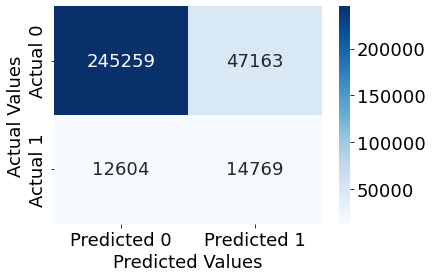

In [429]:
confusion_matrix_data(test,test.HeartDisease,model36,0.6)

# Interactions

In [430]:
train_smote = copy

In [431]:
#Interaction between Asthma and Smoking
model2 = sm.logit(formula = 'HeartDisease~AgeCategory+GenHealth+Asthma*Smoking+Diabetic+KidneyDisease+Stroke+Sex+AlcoholDrinking+DiffWalking+BMI+SkinCancer+MentalHealth+Race+SleepTime+PhysicalActivity+PhysicalHealth', data = train_smote).fit()



Optimization terminated successfully.
         Current function value: 0.444382
         Iterations 7


Classification accuracy = 81.3%
Precision = 23.9%
TPR or Recall = 54.0%
FNR = 46.0%
FPR = 16.1%
ROC-AUC = 78.7%


0         0.044971
1         0.431125
2         0.801097
3         0.647766
4         0.033621
            ...   
319790    0.680089
319791    0.056570
319792    0.150411
319793    0.072680
319794    0.606009
Length: 319795, dtype: float64

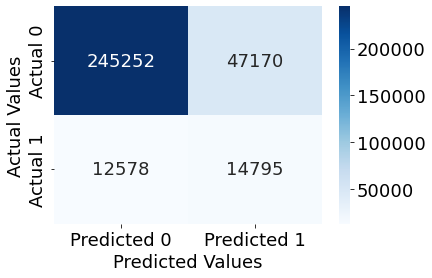

In [432]:
confusion_matrix_data(data,data.HeartDisease,model2,0.6)

In [150]:
#Interaction between Diabetic and Kidney
model3 = sm.logit(formula = 'HeartDisease~AgeCategory+GenHealth+Asthma+Smoking+Diabetic*KidneyDisease+Stroke+Sex+AlcoholDrinking+DiffWalking+BMI+SkinCancer+MentalHealth+Race+SleepTime+PhysicalActivity+PhysicalHealth', data = train_smote).fit()


Optimization terminated successfully.
         Current function value: 0.444270
         Iterations 7


Classification accuracy = 81.3%
Precision = 23.9%
TPR or Recall = 54.1%
FNR = 45.9%
FPR = 16.1%
ROC-AUC = 78.7%


0         0.044135
1         0.432285
2         0.798342
3         0.649588
4         0.033682
            ...   
319790    0.676352
319791    0.056940
319792    0.151152
319793    0.072796
319794    0.607844
Length: 319795, dtype: float64

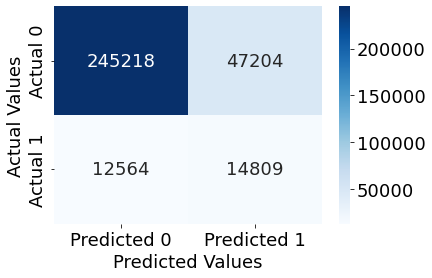

In [151]:
confusion_matrix_data(data,data.HeartDisease,model3,0.6)

In [152]:
#Interaction between both
model4 = sm.logit(formula = 'HeartDisease~AgeCategory+GenHealth+Asthma*Smoking+Diabetic*KidneyDisease+Stroke+Sex+AlcoholDrinking+DiffWalking+BMI+SkinCancer+MentalHealth+Race+SleepTime+PhysicalActivity+PhysicalHealth', data = train_smote).fit()


Optimization terminated successfully.
         Current function value: 0.444270
         Iterations 7


Classification accuracy = 81.3%
Precision = 23.9%
TPR or Recall = 54.1%
FNR = 45.9%
FPR = 16.1%
ROC-AUC = 78.7%


0         0.043928
1         0.432196
2         0.797531
3         0.649480
4         0.033674
            ...   
319790    0.675257
319791    0.056671
319792    0.151091
319793    0.072763
319794    0.607713
Length: 319795, dtype: float64

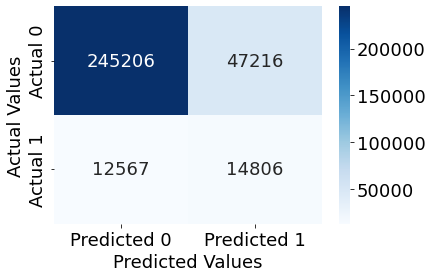

In [153]:
confusion_matrix_data(data,data.HeartDisease,model4,0.6)

In [154]:
#AgeCategory * GenHealth
model5 = sm.logit(formula = 'HeartDisease~AgeCategory*GenHealth+Asthma+Smoking+Diabetic+KidneyDisease+Stroke+Sex+AlcoholDrinking+DiffWalking+BMI+SkinCancer+MentalHealth+Race+SleepTime+PhysicalActivity+PhysicalHealth', data = train_smote).fit()


Optimization terminated successfully.
         Current function value: 0.441727
         Iterations 8


Classification accuracy = 80.6%
Precision = 23.2%
TPR or Recall = 54.8%
FNR = 45.2%
FPR = 17.0%
ROC-AUC = 78.8%


0         0.034741
1         0.485458
2         0.781655
3         0.646952
4         0.026793
            ...   
319790    0.687399
319791    0.046321
319792    0.144988
319793    0.068795
319794    0.605644
Length: 319795, dtype: float64

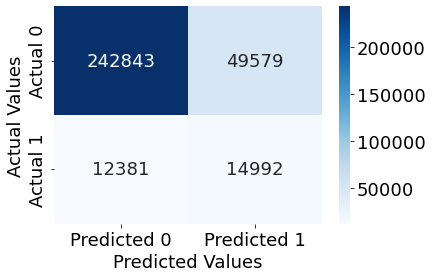

In [155]:
confusion_matrix_data(data,data.HeartDisease,model5,0.6)

In [156]:
model6 = sm.logit(formula = 'HeartDisease~AgeCategory+GenHealth+Asthma+Smoking+Diabetic+KidneyDisease+Sex+AlcoholDrinking+Stroke*DiffWalking+BMI+SkinCancer+MentalHealth+Race+SleepTime+PhysicalActivity+PhysicalHealth', data = train_smote).fit()


Optimization terminated successfully.
         Current function value: 0.444381
         Iterations 7


Classification accuracy = 81.3%
Precision = 23.9%
TPR or Recall = 54.1%
FNR = 45.9%
FPR = 16.1%
ROC-AUC = 78.7%


0         0.045190
1         0.426468
2         0.802066
3         0.648101
4         0.033514
            ...   
319790    0.680638
319791    0.056873
319792    0.150557
319793    0.072738
319794    0.606510
Length: 319795, dtype: float64

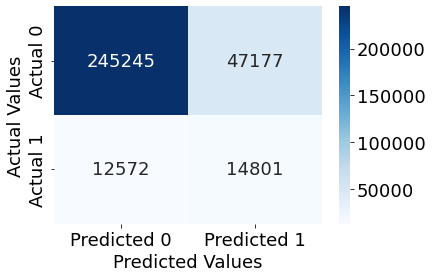

In [157]:
confusion_matrix_data(data,data.HeartDisease,model6,0.6)